In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import zipfile
import pathlib


# Preparing The Data

In [23]:
# Drive public ID for the zip file
images_zip = '1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ'

# Download the zip file
!gdown --id $images_zip

# Define the directory where you want to extract the data
data_dir_train = pathlib.Path("/content/seg_train/seg_train")  # Adjust the directory name as needed
data_dir_test = pathlib.Path("/content/seg_test/seg_test")  # Adjust the directory name as needed
data_dir_pred = pathlib.Path("/content/seg_pred/seg_pred")  # Adjust the directory name as needed

# Unzip the file
with zipfile.ZipFile('TP1-3-natural-scenes.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Remove the zip file after extraction
!rm 'TP1-3-natural-scenes.zip'

# Verify the directory content
print("Directory content after extraction:", os.listdir(data_dir))

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ
From (redirected): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ&confirm=t&uuid=e2a72a6b-476b-45e5-9cf2-bafe3720a2e6
To: /content/TP1-3-natural-scenes.zip
100% 363M/363M [00:01<00:00, 298MB/s]
Directory content after extraction: ['buildings', 'glacier', 'street', 'sea', 'forest', 'mountain']


/content/seg_train/seg_train/forest/3574.jpg


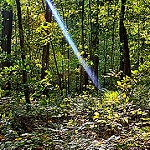

In [24]:
forest_sample = list(data_dir_train.glob('forest/*'))
print(forest_sample[14])
PIL.Image.open(str(forest_sample[14]))

In [25]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [27]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


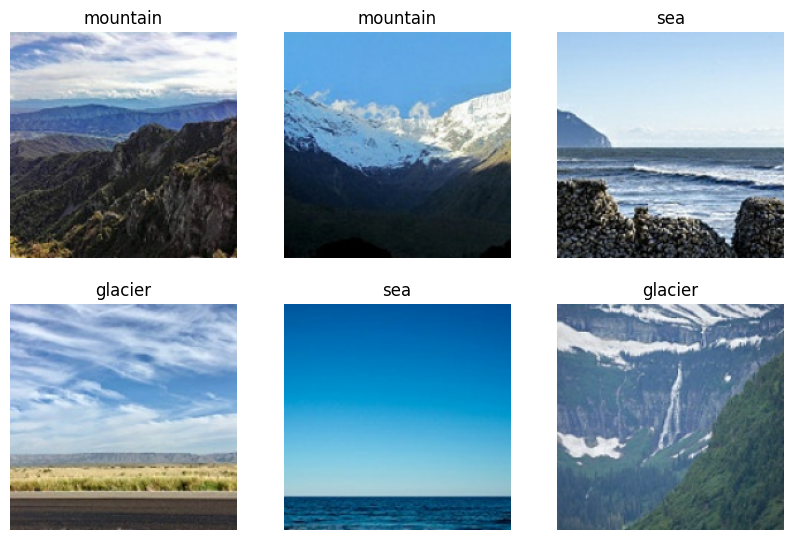

In [29]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")